In [ ]:
import pandas as pd

sqa_df = pd.read_csv('../../oos_test_march/output/sqa_results_march.csv')
bf_df = pd.read_csv("../../oos_test_march/output/bf_results_march.csv")

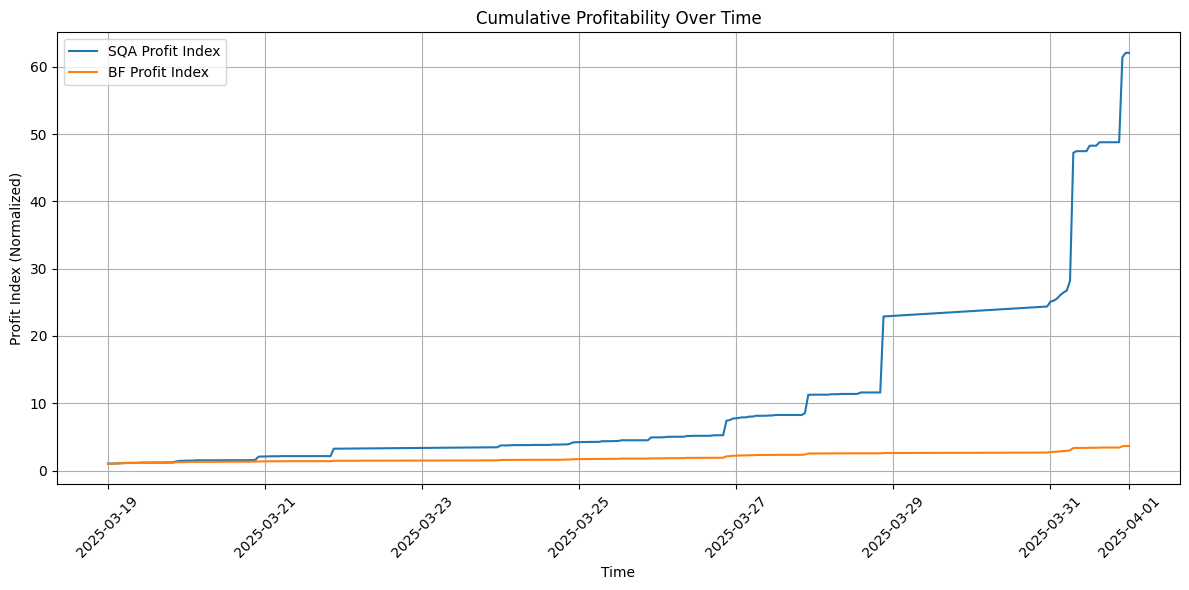

In [ ]:
import matplotlib.pyplot as plt

# Convert timestamps to datetime
sqa_df['timestamp'] = pd.to_datetime(sqa_df['timestamp'])
bf_df['timestamp'] = pd.to_datetime(bf_df['timestamp'])

# Sort by timestamp to ensure correct ordering
sqa_df = sqa_df.sort_values('timestamp')
bf_df = bf_df.sort_values('timestamp')

# Aggregate SQA
sqa_aggregated = sqa_df.groupby('timestamp')['profit_pct'].sum().sort_index()
bf_aggregated = bf_df.groupby('timestamp')['profit_pct'].sum().sort_index()

# cumulative profitability index
sqa_index = (1 + sqa_aggregated.fillna(0)).cumprod()
bf_index = (1 + bf_aggregated.fillna(0)).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sqa_index.index, sqa_index, label='SQA Profit Index')
plt.plot(bf_index.index, bf_index, label='BF Profit Index')
plt.title('Cumulative Profitability Over Time')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Profit Index (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/profitability_index_plot.png", dpi=600)
plt.show()

